# 2

## d

### i

In [2]:
import numpy as np
import matplotlib.pyplot as plt

n = 50
Sigma = np.diag([10**((i-20)/5) for i in range(1,n+1)])
np.random.seed(0)
X = np.array([np.ones(n),np.random.normal(0,1,n)]).T
beta = np.array([1,0.25])
epsilon = np.random.multivariate_normal(np.zeros(n),Sigma)
y = X @ beta + epsilon


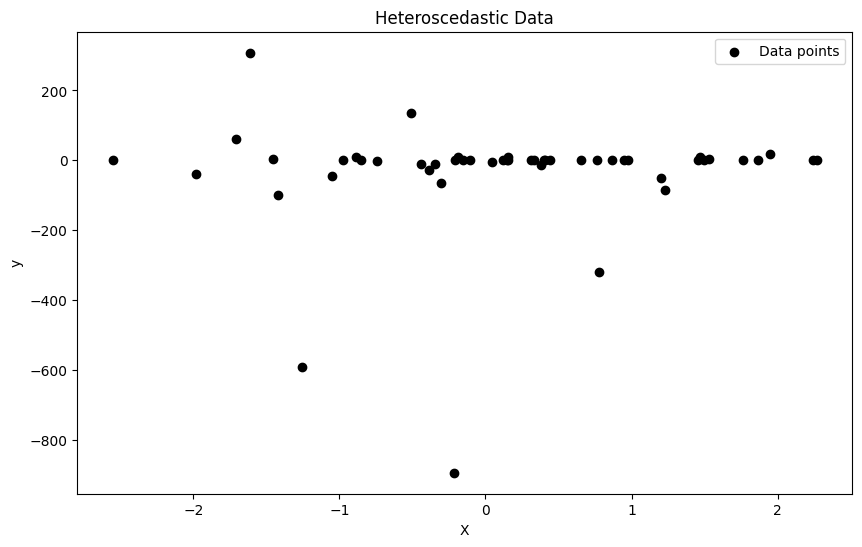

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,1], y, color='black', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Heteroscedastic Data')
plt.legend()
plt.show()



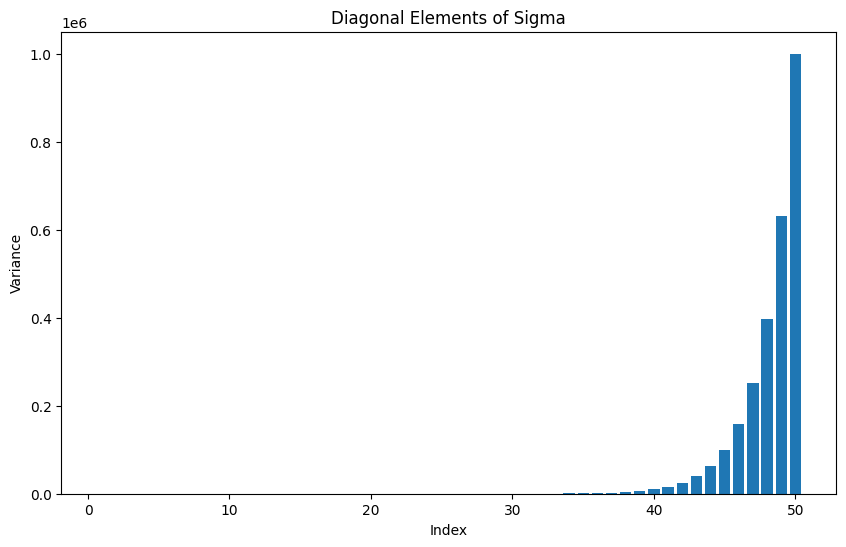

In [4]:
plt.figure(figsize=(10,6))
plt.bar(range(1, n+1), np.diag(Sigma))
plt.xlabel('Index')
plt.ylabel('Variance')
plt.title('Diagonal Elements of Sigma')
plt.show()

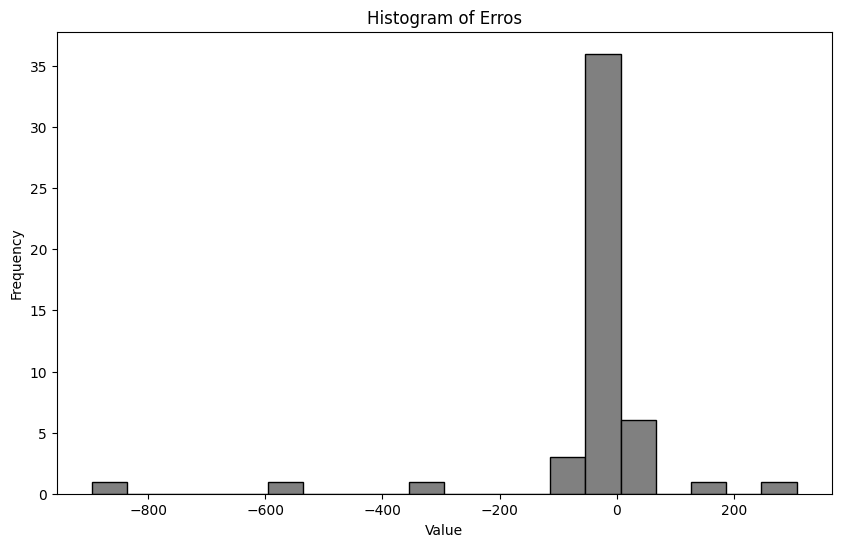

In [5]:
plt.figure(figsize=(10,6))
plt.hist(epsilon, bins=20, color='gray', edgecolor='black')
plt.xlabel('Value') 
plt.ylabel('Frequency')
plt.title('Histogram of Erros')
plt.show()


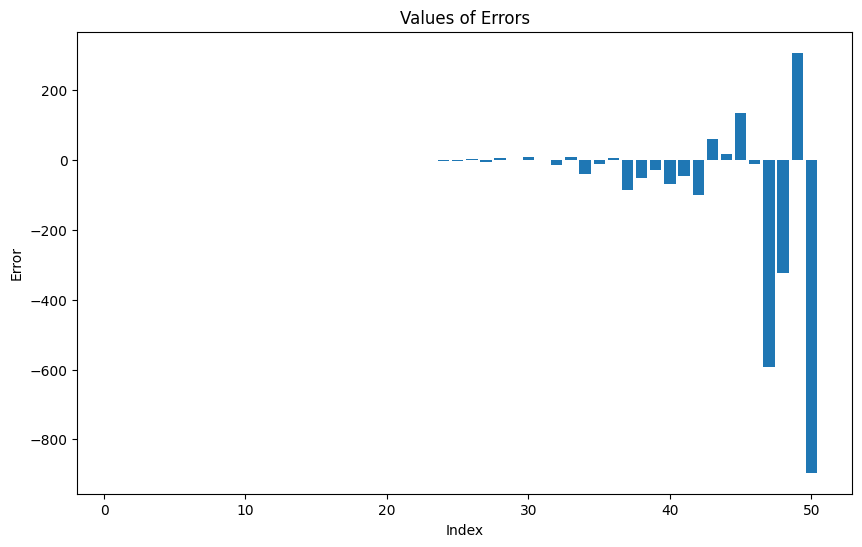

In [6]:
plt.figure(figsize=(10,6))
plt.bar(range(1, n+1), epsilon)
plt.xlabel('Index') 
plt.ylabel('Error')
plt.title('Values of Errors')
plt.show()

### ii

In [7]:
def beta_ordinary(X: np.ndarray, Y: np.ndarray)-> np.ndarray:
    """
    Compute the ordinary least squares estimator.
    
    Parameters:
    X : np.ndarray
        Input matrix of shape (samples, features + 1) or (n,p).
    Y : np.ndarray
        Output vector of shape (samples,) or (n,).
    Returns:
    beta : np.ndarray
        Estimated coefficients vector of shape (features + 1,) or (p,).

    """
    beta = np.linalg.inv(X.T @ X) @ X.T @ Y
    return beta

def beta_sigma(X: np.ndarray, Y: np.ndarray, Sigma: np.ndarray) -> np.ndarray:
    """
    Compute the generalized least squares estimator considering the covariance matrix Sigma.
    Parameters:
    X : np.ndarray
        Input matrix of shape (samples, features + 1) or (n,p).
    Y : np.ndarray
        Output vector of shape (samples,) or (n,).
    Sigma : np.ndarray
        Covariance matrix of shape (samples, samples) or (n,n). This is the covariance matrix of the errors. 
        It does not assume homoscedasticity thus the values of the diagonal can be different. But any value 
        out of the diagonal must be zero since the errors are uncorrelated.

    
    Returns:
    beta : np.ndarray
        Estimated coefficients vector of shape (features + 1,) or (p,).
    """
    
    Sigma_1 = np.linalg.inv(Sigma)
    beta = np.linalg.inv(X.T @ Sigma_1 @ X ) @ X.T @ Sigma_1 @ Y
    return beta

beta_hat_ordinary = beta_ordinary(X,y)
beta_hat_sigma = beta_sigma(X,y,Sigma)

print("True Beta:", beta)
print("Ordinary Beta:", beta_hat_ordinary)
print("Beta Sigma:", beta_hat_sigma)

print("\nNorms of the differences:")
print("True Beta and Ordinary Beta:", np.linalg.norm(beta - beta_hat_ordinary, ord=2))
print("True Beta and Beta Sigma:", np.linalg.norm(beta - beta_hat_sigma, ord=2))

True Beta: [1.   0.25]
Ordinary Beta: [-34.46344733   6.94756948]
Beta Sigma: [1.01885254 0.24436202]

Norms of the differences:
True Beta and Ordinary Beta: 36.090352364198814
True Beta and Beta Sigma: 0.01967752591798597


### iii

In [8]:
import scipy
def p_value_ordinary_least_square(X: np.ndarray, Y: np.ndarray, beta_ordinary_hat: np.ndarray, j: int) -> float:
    """
    Compute the p-value for the j-th coefficient of the ordinary least squares estimator.
    Parameters:
    X : np.ndarray
        Input matrix of shape (samples, features + 1) or (n,p).
    Y : np.ndarray
        Output vector of shape (samples,) or (n,).
    beta_ordinary_hat : np.ndarray
        Estimated coefficients vector of shape (features + 1,) or (p,).
    j : int
        Index of the coefficient to compute the p-value for.
    Returns:
    p_value : float
        p-value for the j-th coefficient.
    """
    
    # Predictions, residuals and other necessary values
    Y_hat = X @ beta_ordinary_hat
    n,p = X.shape
    dof = n - (p)
    errors = (Y - Y_hat)
    beta_j = beta_ordinary_hat[j]

    # Z statistic 
    x_j_var = (np.linalg.inv(X.T @ X))[j,j]
    Z = beta_j / np.sqrt(x_j_var)    
    
    # Estimate of sigma^2
    sigma2_hat = (1/dof)* (errors.T @ errors)
    
    # t statistic and p-value
    t_statistics =  Z / np.sqrt(sigma2_hat)
    t_statistics = np.abs(t_statistics)
    p_value = 2*(1 -  scipy.stats.t.cdf(t_statistics, dof))
    
    return p_value


beta0_hat_ordinary_p_value = p_value_ordinary_least_square(X, y, beta_hat_ordinary,0)
beta1_hat_ordinary_p_value = p_value_ordinary_least_square(X, y, beta_hat_ordinary,1)

print("p-value of ordinary beta_0 =", beta0_hat_ordinary_p_value)
print("p-value of ordinary beta_1 =", beta1_hat_ordinary_p_value)
print("We can not discard the null hypothesis for both coefficients at 5% significance level.")

p-value of ordinary beta_0 = 0.1543599725443663
p-value of ordinary beta_1 = 0.7421602010802748
We can not discard the null hypothesis for both coefficients at 5% significance level.


In [9]:
# Sanity check with statsmodels
import statsmodels.api as sm
sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.1095
Date:                Thu, 22 Jan 2026   Prob (F-statistic):              0.742
Time:                        14:44:51   Log-Likelihood:                -325.86
No. Observations:                  50   AIC:                             655.7
Df Residuals:                      48   BIC:                             659.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.4634     23.815     -1.447      0.154     -82.347      13.420
x1             6.9476     20.996      0.331      0.742     -35.268      49.163
==============================================================================
Omnibus:                       66.974   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              590.548
Skew:                          -3.511   Prob(JB):                    5.81e-129
Kurtosis:                      18.302   Cond. No.                         1.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### iv

In [10]:
def calculate_Z_sigma(X: np.ndarray, Sigma: np.ndarray, Beta_sigma: np.ndarray, j: int) -> float:
    """
    Compute the Z statistic for the j-th coefficient of the generalized least squares estimator.
    Parameters:
    X : np.ndarray
        Input matrix of shape (samples, features + 1) or (n,p).
    Sigma : np.ndarray
        Covariance matrix of shape (samples, samples) or (n,n). This is the covariance matrix of the errors. 
        It does not assume homoscedasticity thus the values of the diagonal can be different. But any value 
        out of the diagonal must be zero since the errors are uncorrelated.
    Beta_sigma : np.ndarray
        Estimated coefficients vector of shape (features + 1,) or (p,).
    j : int
        Index of the coefficient to compute the Z statistic for.
    Returns:
    Z : float
        Z statistic for the j-th coefficient.
    """
    Sigma_inv = np.linalg.inv(Sigma)
    den = np.linalg.inv(X.T @ Sigma_inv @ X)
    den = den[j,j]
    Z = Beta_sigma[j]/(np.sqrt(den))
    return Z

Z = calculate_Z_sigma(X, Sigma, beta_hat_sigma, j=0)
print("Z_sigma of Beta_0 =", Z)


Z_sigma of Beta_0 = 73.67232264052195


### v

In [11]:
def p_value_generalized_least_square(X: np.ndarray, Y: np.ndarray, Sigma: np.ndarray, beta_ordinary_hat: np.ndarray, j: int) -> float:
    """
    Compute the p-value for the j-th coefficient of the generalized least squares estimator.
    Parameters:
    X : np.ndarray
        Input matrix of shape (samples, features + 1) or (n,p).
    Y : np.ndarray
        Output vector of shape (samples,) or (n,).
    Sigma : np.ndarray
        Covariance matrix of shape (samples, samples) or (n,n).
    beta_ordinary_hat : np.ndarray
        Estimated coefficients vector of shape (features + 1,) or (p,).
    j : int
        Index of the coefficient to compute the p-value for.
    Returns:
    p_value : float
        p-value for the j-th coefficient.
    """
    
    # Predictions, residuals and other necessary values
    Y_hat = X @ beta_ordinary_hat
    n,p = X.shape
    dof = n - (p)
    errors = (Y - Y_hat)

    # Z statistic 
    Z_sigma = calculate_Z_sigma(X, Sigma, beta_hat_sigma,j)
    
    # Estimate of sigma^2
    inverse_Sigma = np.linalg.inv(Sigma)
    sigma2_hat = (1/dof)* (errors.T @ inverse_Sigma @ errors)
    
    # t statistic and p-value
    t_statistics =  Z_sigma / np.sqrt(sigma2_hat)
    t_statistics = np.abs(t_statistics)
    p_value = 2*(1 -  scipy.stats.t.cdf(t_statistics, dof))
    
    return p_value

p_value_beta0_sigma = p_value_generalized_least_square(X,y,Sigma,beta_hat_sigma,0)
p_value_beta1_sigma = p_value_generalized_least_square(X,y,Sigma,beta_hat_sigma,1)

print(p_value_beta0_sigma)
print(p_value_beta1_sigma)

0.0
0.0


# 3
## f
### i

In [53]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
np.random.seed(1)
beta = np.array([-1.5, 2.0])
input_range = np.linspace(-1, 1, 100)
X = np.vstack([np.ones(100), input_range]).T
y = X @ beta + np.random.normal(0, 0.3, 100)

def calculate_laplacian_loss(parameters, X, y):
    return np.sum(np.abs(y - X @ parameters))

epsilon = y - X @ beta
n = len(epsilon)


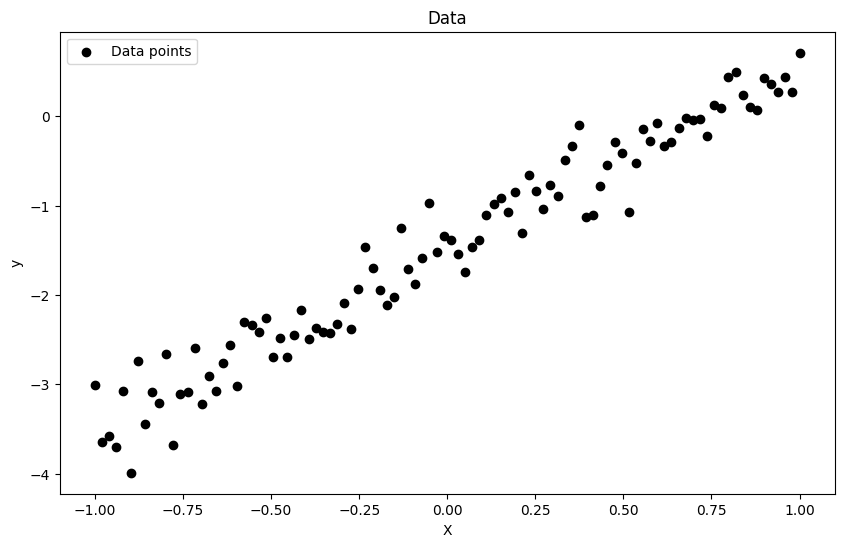

In [48]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,1], y, color='black', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data')
plt.legend()
plt.show()



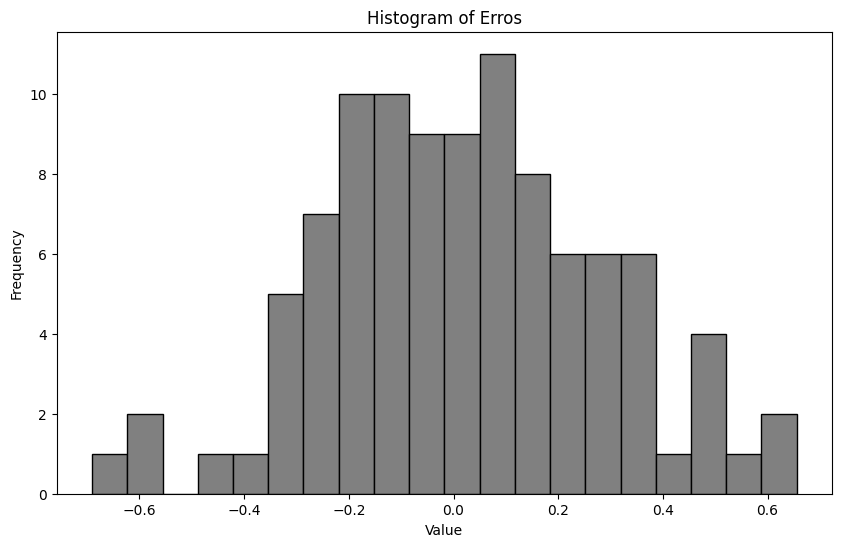

In [51]:
plt.figure(figsize=(10,6))
plt.hist(epsilon, bins=20, color='gray', edgecolor='black')
plt.xlabel('Value') 
plt.ylabel('Frequency')
plt.title('Histogram of Erros')
plt.show()


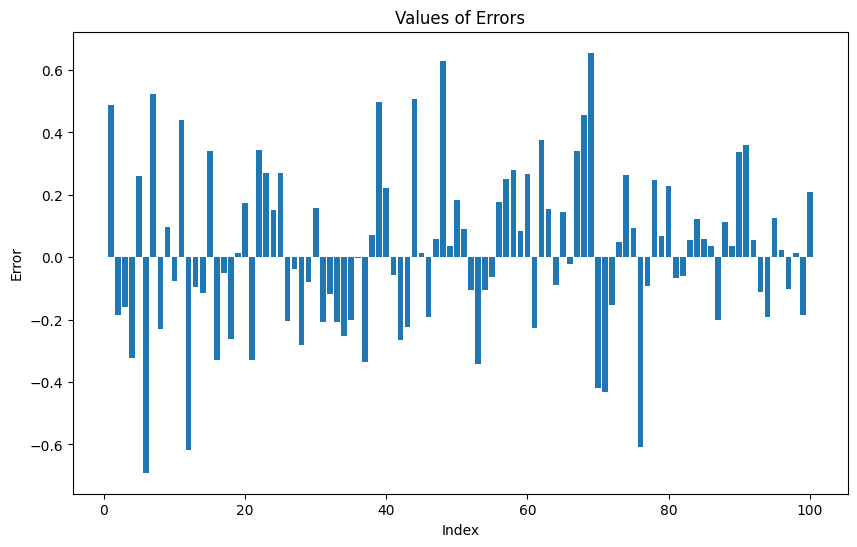

In [54]:
plt.figure(figsize=(10,6))
plt.bar(range(1, n+1), epsilon)
plt.xlabel('Index') 
plt.ylabel('Error')
plt.title('Values of Errors')
plt.show()

In [40]:
def calculate_beta_hat(X: np.ndarray, Y: np.ndarray, error_distribution: str) -> np.ndarray:
    """
    Compute the estimator beta_hat based on the specified error distribution.
    Parameters:
    X : np.ndarray
        Input matrix of shape (samples, features + 1) or (n,p).
    Y : np.ndarray
        Output vector of shape (samples,) or (n,).
    error_distribution : str
        Type of error distribution ('gaussian' or 'laplacian').
    Returns:
    beta_hat : np.ndarray
        Estimated coefficients vector of shape (features + 1,) or (p,).
    """
    
    np.random.seed(0)
    
    p = X.shape[1]
    if error_distribution == 'gaussian':
        def loss_function(beta):
            return np.sum((Y-X @ beta)**2 )
    elif error_distribution =='laplacian':
        def loss_function(beta):
            return np.sum(np.abs(Y-X @ beta))
    else: 
        raise ValueError("Unsupported error distribution") 

    beta_0 = np.random.uniform(size=p)
    beta_hat = scipy.optimize.minimize(loss_function,beta_0)
    return beta_hat['x']

beta_hat_gaussian = calculate_beta_hat(X, y, 'gaussian')
beta_hat_gaussian_old_function = beta_ordinary(X,y)
beta_hat_laplacian = calculate_beta_hat(X, y, 'laplacian')

# Print results
print("True Coefficients:", beta)
print("Coefficients (Gaussian with minimize):", beta_hat_gaussian)
print("Coefficients (Gaussian closed form):", beta_hat_gaussian_old_function)
print("Coefficients (Laplacian):", beta_hat_laplacian)

True Coefficients: [-1.5  2. ]
Coefficients (Gaussian with minimize): [-1.48182515  2.04962669]
Coefficients (Gaussian closed form): [-1.48182514  2.0496267 ]
Coefficients (Laplacian): [-1.4978794   2.08212298]


### ii

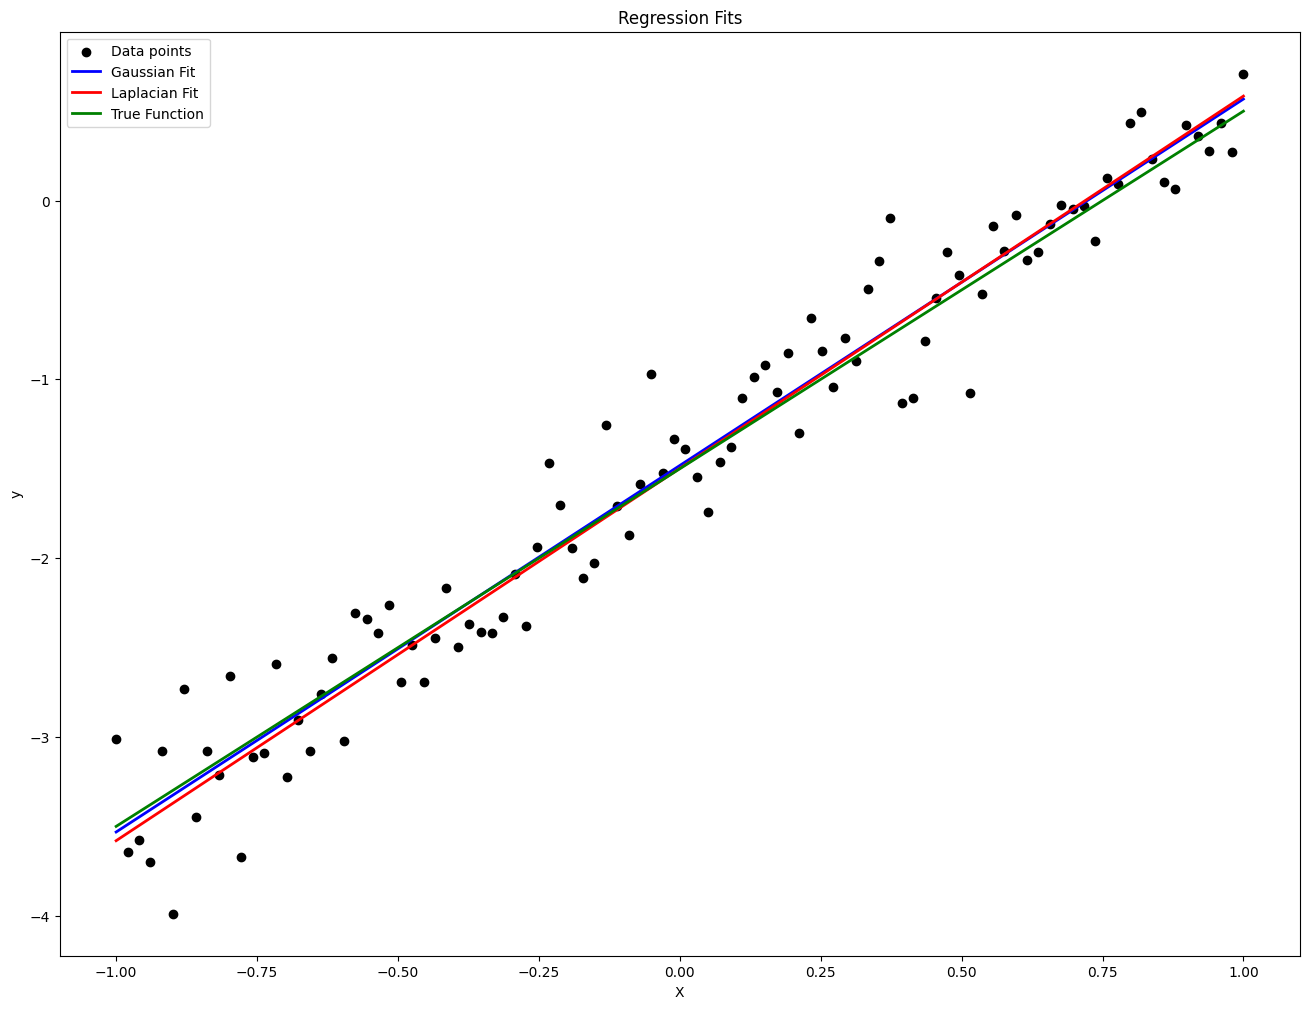

In [46]:
yhat_gaussina = X @ beta_hat_gaussian
yhat_laplace = X @ beta_hat_laplacian
yhat_real = X @ beta

plt.figure(figsize=(16,12))
plt.scatter(X[:,1], y, color='black', label='Data points')
plt.plot(X[:,1], yhat_gaussina, color='blue', label='Gaussian Fit', linewidth=2)
plt.plot(X[:,1], yhat_laplace, color='red', label='Laplacian Fit', linewidth=2)
plt.plot(X[:,1], yhat_real, color='green', label='True Function', linewidth=2)
plt.title('Regression Fits')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [58]:
error_gaussian = np.linalg.norm(beta - beta_hat_gaussian, ord=2)
error_laplacian = np.linalg.norm(beta - beta_hat_laplacian, ord=2)
print("L2 Error of estimators (Gaussian):", error_gaussian)
print("L2 Error of estimators (Laplacian):", error_laplacian)

L2 Error of estimators (Gaussian): 0.0528500998831934
L2 Error of estimators (Laplacian): 0.08215035729023573


### iii

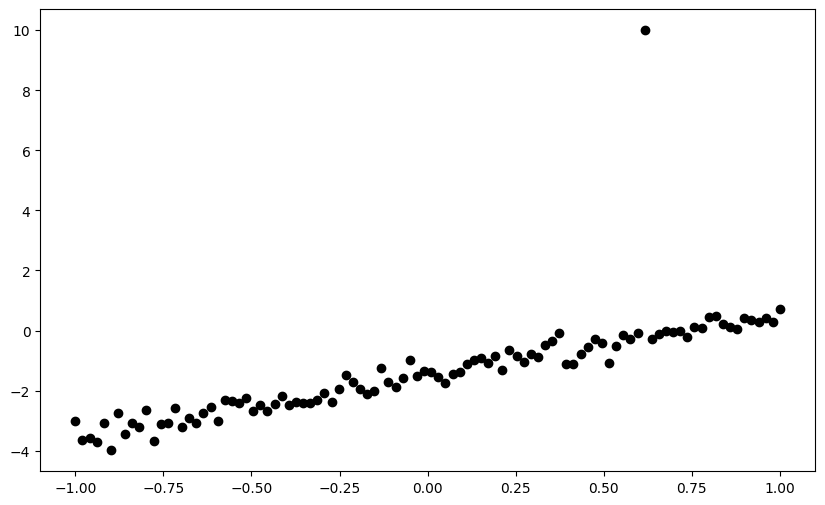

In [55]:
# Regenerate data for reproducibility
np.random.seed(1)
beta = np.array([-1.5, 2.0])
input_range = np.linspace(-1, 1, 100)
X = np.vstack([np.ones(100), input_range]).T
y = X @ beta + np.random.normal(0, 0.3, 100)
y[80] = 10

plt.figure(figsize=(10,6))
plt.scatter(X[:,1], y, color='black', label='Data points')

In [57]:
# Calculate new estimators
beta_hat_gaussian_outlier = calculate_beta_hat(X, y, 'gaussian')
beta_hat_gaussian_old_outlier = beta_ordinary(X,y)
beta_hat_laplacian_outlier = calculate_beta_hat(X, y, 'laplacian')

print("True Coefficients:", beta)
print("Coefficients (Gaussian with minimize) with outlier:", beta_hat_gaussian_outlier)
print("Coefficients (Gaussian closed form) with outlier:", beta_hat_gaussian_old_outlier)
print("Coefficients (Laplacian) with outlier:", beta_hat_laplacian_outlier)

True Coefficients: [-1.5  2. ]
Coefficients (Gaussian with minimize) with outlier: [-1.3784814   2.23687319]
Coefficients (Gaussian closed form) with outlier: [-1.37848139  2.2368733 ]
Coefficients (Laplacian) with outlier: [-1.49766215  2.08258059]


In [59]:
error_gaussian_outlier = np.linalg.norm(beta - beta_hat_gaussian_outlier, ord=2)
error_laplacian_outlier = np.linalg.norm(beta - beta_hat_laplacian_outlier, ord=2)
print("L2 Error of estimators with outlier (Gaussian):", error_gaussian_outlier)
print("L2 Error of estimators with outlier (Laplacian):", error_laplacian_outlier)

L2 Error of estimators with outlier (Gaussian): 0.26622486020169933
L2 Error of estimators with outlier (Laplacian): 0.08261367841483944


# 4


In [76]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression as LR
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn import preprocessing
df = pd.read_csv("./data/soccer.csv")
X = df.drop("target", axis=1)
y = df[["target"]]


X_train, y_train = X.iloc[:2560], y.iloc[:2560]
X_test, y_test = X.iloc[2560:], y.iloc[2560:]


print("Samples of X_train dataset", X_train.shape[0])
print("Samples of X_test dataset", X_test.shape[0])
print("Samples of y_train dataset", y_train.shape[0])
print("Samples of y_test dataset", y_test.shape[0])

print('X_train:')
display(X_train.head())
print('y_train:')
display(y_train.head())
print('X_test:')
display(X_test.head())
print('y_test:')
display(y_test.head())

Samples of X_train dataset 2560
Samples of X_test dataset 640
Samples of y_train dataset 2560
Samples of y_test dataset 640
X_train:


,home_team,away_team,rank_dif,goals_dif,goals_dif_l5,goals_suf_dif,goals_suf_dif_l5,goals_per_ranking_dif,dif_rank_agst,dif_rank_agst_l5,dif_points_rank,dif_points_rank_l5,is_friendly_1
0,Barbados,Cuba,-21.0,2.0,2.0,1.0,1.0,0.037037,-92.0,-92.0,0.018519,0.018519,1
1,Barbados,Cuba,-21.0,1.0,1.0,0.5,0.5,0.008511,-35.5,-35.5,0.008897,0.008897,1
2,Mongolia,Guam,-4.0,4.0,4.0,-1.0,-1.0,0.021622,0.0,0.0,0.016216,0.016216,0
3,Nepal,Bhutan,-22.0,1.0,1.0,0.0,0.0,0.004975,7.0,7.0,0.000000,0.000000,0
4,Bangladesh,Pakistan,-7.0,-1.0,-1.0,-0.5,-0.5,-0.007200,30.5,30.5,-0.010437,-0.010437,0


y_train:


,target
0,1
1,1
2,1
3,0
4,0


X_test:


,home_team,away_team,rank_dif,goals_dif,goals_dif_l5,goals_suf_dif,goals_suf_dif_l5,goals_per_ranking_dif,dif_rank_agst,dif_rank_agst_l5,dif_points_rank,dif_points_rank_l5,is_friendly_1
2560,Morocco,Comoros,-104.0,0.781250,0.2,-0.912202,-0.4,0.013097,-30.389881,-68.6,0.025636,0.030096,0
2561,Gabon,Ghana,37.0,-0.090686,0.2,0.443627,0.2,-0.003208,15.752451,15.6,-0.002582,-0.004016,0
2562,South Korea,Iceland,-29.0,0.647619,0.2,-1.080952,-0.6,0.004299,17.052381,-26.0,0.015580,0.026649,1
2563,Nigeria,Sudan,-89.0,0.401434,1.0,-0.573477,-1.6,0.007106,-21.334528,18.0,0.027568,0.022632,0
2564,Guinea-Bissau,Egypt,61.0,-0.770690,-0.8,0.998276,0.8,-0.007272,-7.724138,30.8,-0.013644,-0.011007,0


y_test:


,target
2560,0
2561,1
2562,0
2563,0
2564,1


In [77]:
X_train = X_train.drop(["home_team", "away_team"], axis=1)
X_test = X_test.drop(["home_team", "away_team"], axis=1)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = preprocessing.scale(X_train)
X_test = scaler.transform(X_test)

display(pd.DataFrame(X_train).head())
display(pd.DataFrame(X_test).head())

,0,1,2,3,4,5,6,7,8,9,10
0,-0.248218,2.245957,1.710918,1.089978,0.869097,1.193660,-2.697098,-2.504762,0.221283,0.178124,1.741119
1,-0.248218,1.101890,0.831728,0.570203,0.452160,0.236789,-0.972943,-0.919497,0.065923,0.061954,1.741119
2,0.042702,4.534091,3.469298,-0.989123,-0.798652,0.676576,0.110376,0.076554,0.184109,0.150327,-0.574343
3,-0.265331,1.101890,0.831728,0.050427,0.035223,0.118196,0.323989,0.272959,-0.077729,-0.045460,-0.574343
4,-0.008637,-1.186244,-0.926653,-0.469348,-0.381715,-0.290212,1.041115,0.932317,-0.246249,-0.171470,-0.574343


,0,1,2,3,4,5,6,7,8,9,10
0,-1.668593,0.851625,0.128376,-0.897853,-0.298327,0.390641,-0.817002,-1.848209,0.336212,0.317906,-0.574343
1,0.744333,-0.145928,0.128376,0.511601,0.201997,-0.156290,0.591079,0.514256,-0.119424,-0.093950,-0.574343
2,-0.385122,0.698742,0.128376,-1.073277,-0.465102,0.095526,0.630747,-0.652948,0.173840,0.276288,1.741119
3,-1.411899,0.417090,0.831728,-0.545731,-1.298977,0.189661,-0.540669,0.581594,0.367399,0.227793,-0.574343
4,1.155044,-0.923898,-0.750815,1.088186,0.702322,-0.292604,-0.125334,0.940734,-0.298027,-0.178358,-0.574343


## b

In [ ]:
models_to_test = [LDA, QDA, LR, NB, kNN]
results_dict = {}
for model_type in models_to_test:
    model_name = model_type.__name__
    params = {}
    if model_type in [LDA,QDA]:
        params.update({'store_covariance': True})
    results_dict[model_name] = {}
    cls = model_type(**params)
    cls.fit(X_train,y_train.values.ravel())
    

    # save model for later analysis
    results_dict[model_name]['in_sample_predictions'] = cls.predict(X_train)
    results_dict[model_name]['test_predictions'] = cls.predict(X_test)
    results_dict[model_name]['model'] = cls
    

    # train model with no ravel for the sake of comparison
    cls2 = model_type(**params)
    cls2.fit(X_train,y_train)
    results_dict[model_name]['in_sample_predictions_no_ravel'] = cls2.predict(X_train)
    results_dict[model_name]['test_predictions_no_ravel'] = cls2.predict(X_test)
    results_dict[model_name]['model_no_ravel'] = cls2

c:\Users\User\miniconda3\envs\ml_impa\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\miniconda3\envs\ml_impa\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\miniconda3\envs\ml_impa\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\miniconda3\envs\ml_impa\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was e

In [152]:
# Check if predictions are the same for both ravel and no ravel models
for model in models_to_test:
    print(model.__name__)
    print("In-sample:", (results_dict[model.__name__]['in_sample_predictions'] == results_dict[model.__name__]['in_sample_predictions_no_ravel']).all())
    print("Test predictions:", (results_dict[model.__name__]['test_predictions'] == results_dict[model.__name__]['test_predictions_no_ravel']).all())
    print('\n')

LinearDiscriminantAnalysis
In-sample: True
Test predictions: True


QuadraticDiscriminantAnalysis
In-sample: True
Test predictions: True


LogisticRegression
In-sample: True
Test predictions: True


GaussianNB
In-sample: True
Test predictions: True


KNeighborsClassifier
In-sample: True
Test predictions: True




In [154]:
# Check the coefficients of all models
for model_name in models_to_test:
    print(model_name.__name__)
    print('\n')
    model = results_dict[model_name.__name__]['model']
    
    features = ['coef_', 'intercept_', 'theta_', 'var_', 'covariance_', 'means_']
    for feature in features:
        if hasattr(model, feature):
            print(f"- {feature}:", getattr(model, feature), '\n')
    print('\n', '-'*100, '\n')

# What is the covariance matrix learned by LDA and QDA?
# What model NBGaussian corresponds to?

LinearDiscriminantAnalysis


- coef_: [[ 0.81083529 -0.25529054 -0.02599754  0.0173857   0.23346639  0.06938222
   0.36611051 -0.04962318 -0.08333928  0.04294283  0.0466658 ]] 

- intercept_: [0.1090176] 

- covariance_: [[ 0.77998276 -0.29321423 -0.28988186  0.33921409  0.32965147 -0.27400118
   0.43809293  0.27007243 -0.31062814 -0.21450372 -0.07323   ]
 [-0.29321423  0.93006391  0.73517881 -0.39009735 -0.32195095  0.45802684
   0.09493708  0.11345468  0.31304343  0.23520374  0.04208835]
 [-0.28988186  0.73517881  0.93334199 -0.31368572 -0.33014768  0.37419603
   0.02412058  0.24146858  0.24982019  0.20443947  0.04177604]
 [ 0.33921409 -0.39009735 -0.31368572  0.91932382  0.77769448 -0.12942208
  -0.03239098 -0.05951943 -0.17720866 -0.14784585 -0.04960233]
 [ 0.32965147 -0.32195095 -0.33014768  0.77769448  0.91175206 -0.11925099
   0.01165817 -0.1587498  -0.16609566 -0.14825051 -0.02481927]
 [-0.27400118  0.45802684  0.37419603 -0.12942208 -0.11925099  0.95275676
  -0.28011282 -0.202

Confusion Matrix for LinearDiscriminantAnalysis:


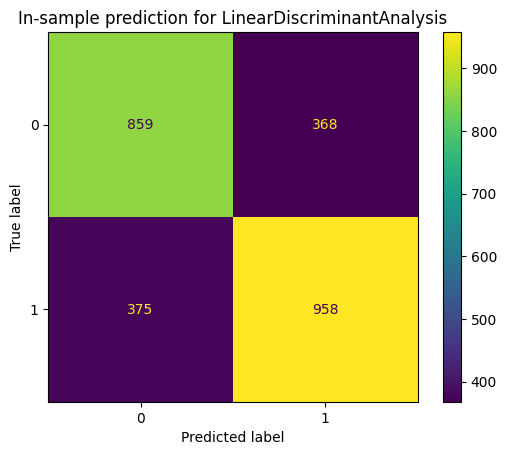

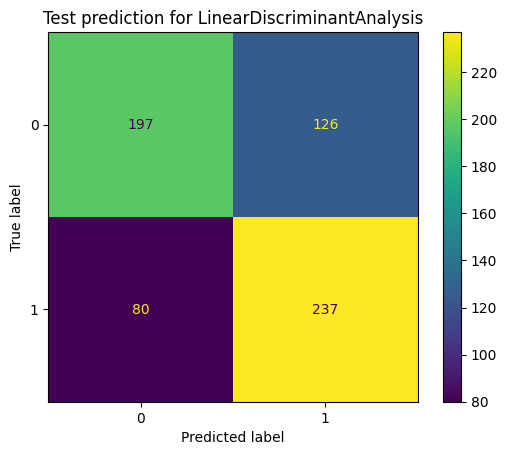


 ---------------------------------------------------------------------------------------------------- 

Confusion Matrix for QuadraticDiscriminantAnalysis:


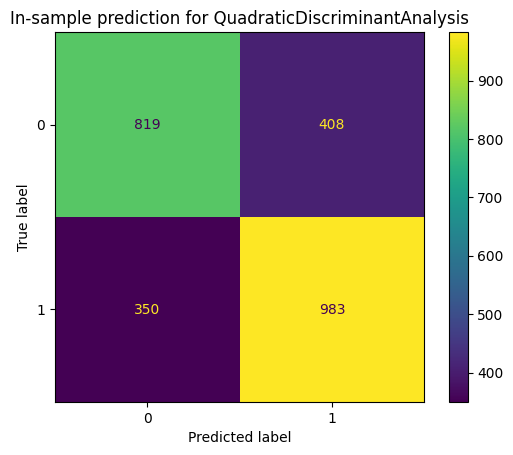

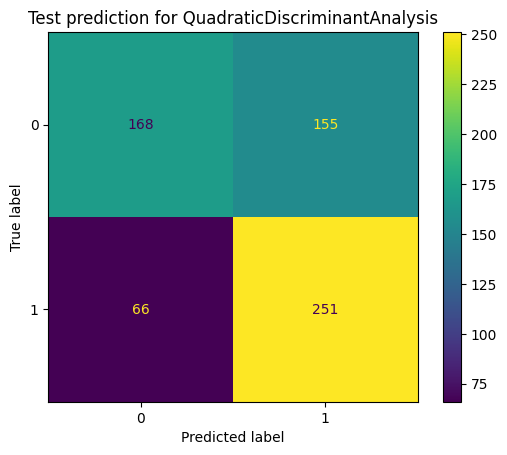


 ---------------------------------------------------------------------------------------------------- 

Confusion Matrix for LogisticRegression:


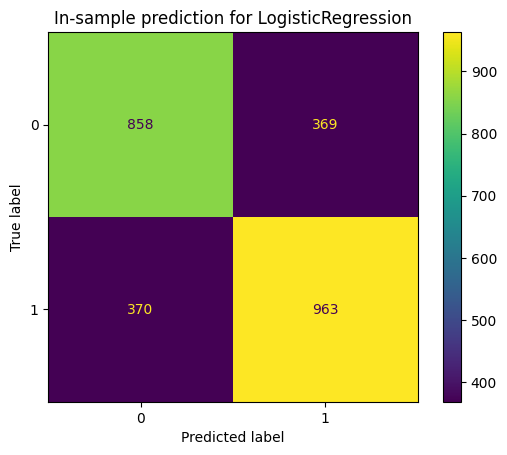

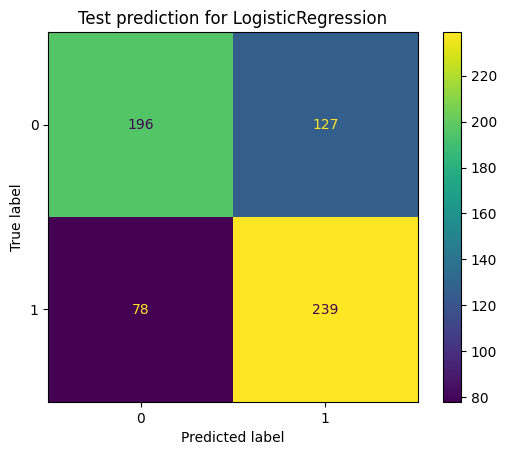


 ---------------------------------------------------------------------------------------------------- 

Confusion Matrix for GaussianNB:


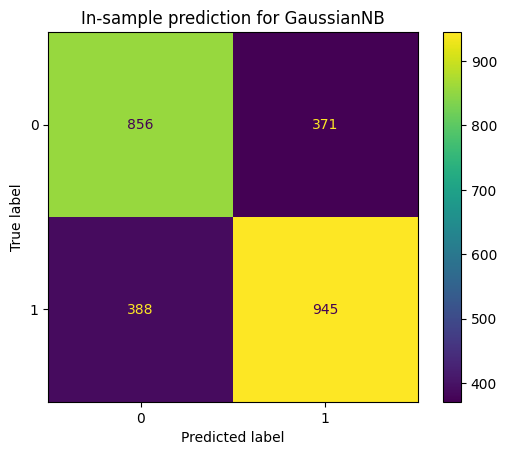

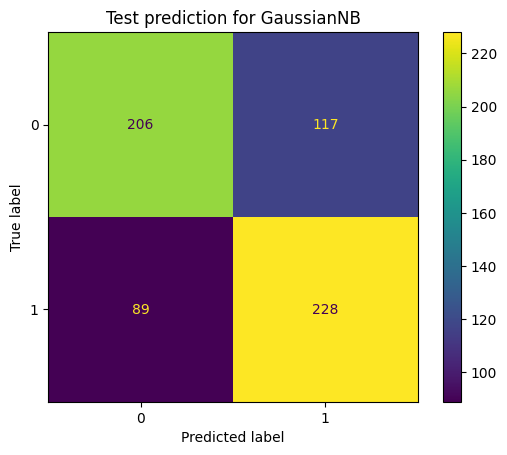


 ---------------------------------------------------------------------------------------------------- 

Confusion Matrix for KNeighborsClassifier:


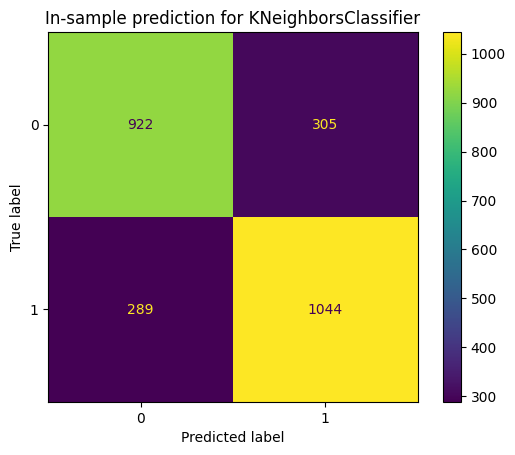

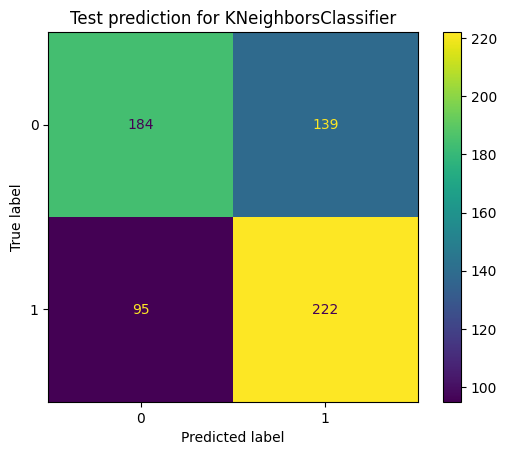


 ---------------------------------------------------------------------------------------------------- 



In [163]:
from sklearn.metrics import ConfusionMatrixDisplay
for model_name in models_to_test:
    model_type_name = model_name.__name__
    in_sample_predictions = results_dict[model_type_name]['in_sample_predictions']
    test_predictions = results_dict[model_type_name]['test_predictions']
    print(f"Confusion Matrix for {model_type_name}:")
    ConfusionMatrixDisplay.from_predictions(y_train, in_sample_predictions)
    plt.title('In-sample prediction for '+ model_type_name)
    plt.show()
    ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
    plt.title('Test prediction for '+ model_type_name)
    plt.show()
    print('\n', '-'*100, '\n')

## c


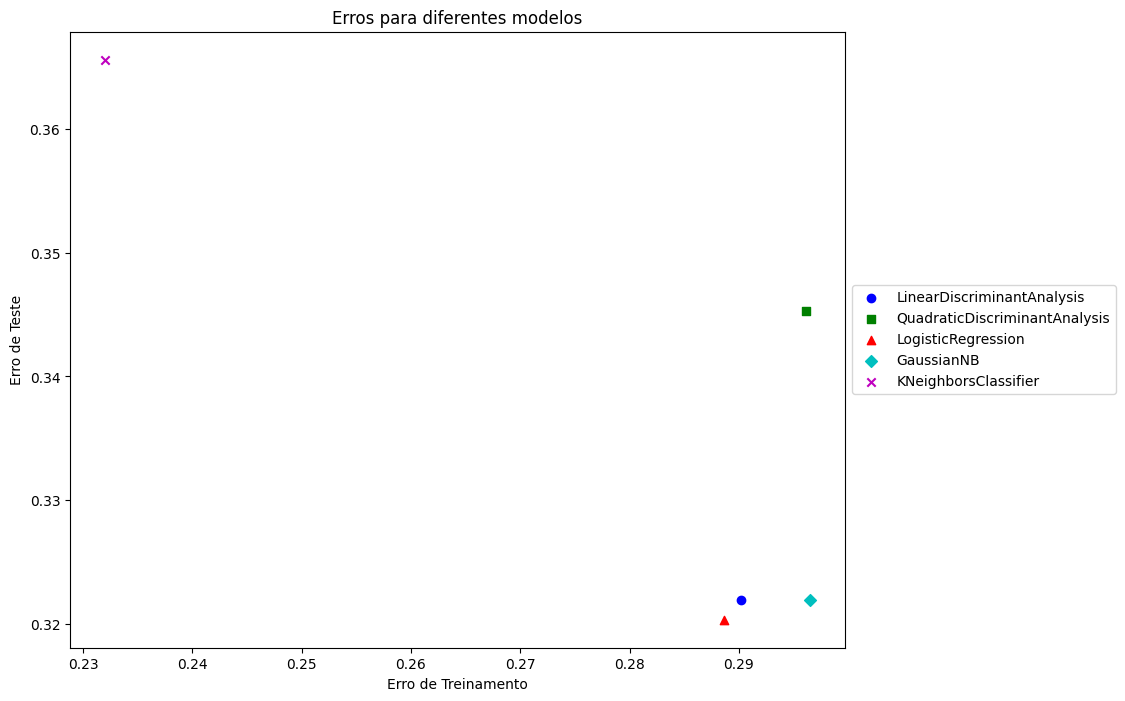

In [172]:
plot_markers = ['o', 's', '^', 'D', 'x']
plot_colors = ['b', 'g', 'r', 'c', 'm']
plt.figure(figsize=(10,8))
i = 0

for model_name in models_to_test:
    model_type_name = model_name.__name__
    in_sample_predictions = results_dict[model_type_name]['in_sample_predictions']
    test_predictions = results_dict[model_type_name]['test_predictions']
    train_error = np.mean(in_sample_predictions != y_train.values.ravel())
    test_error = np.mean(test_predictions != y_test.values.ravel())
    plt.scatter(train_error, test_error, label= model_type_name, color=plot_colors[i], marker=plot_markers[i])
    i += 1

plt.title(f'Erros para diferentes modelos')
plt.xlabel('Erro de Treinamento')
plt.ylabel('Erro de Teste')
#move legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### d

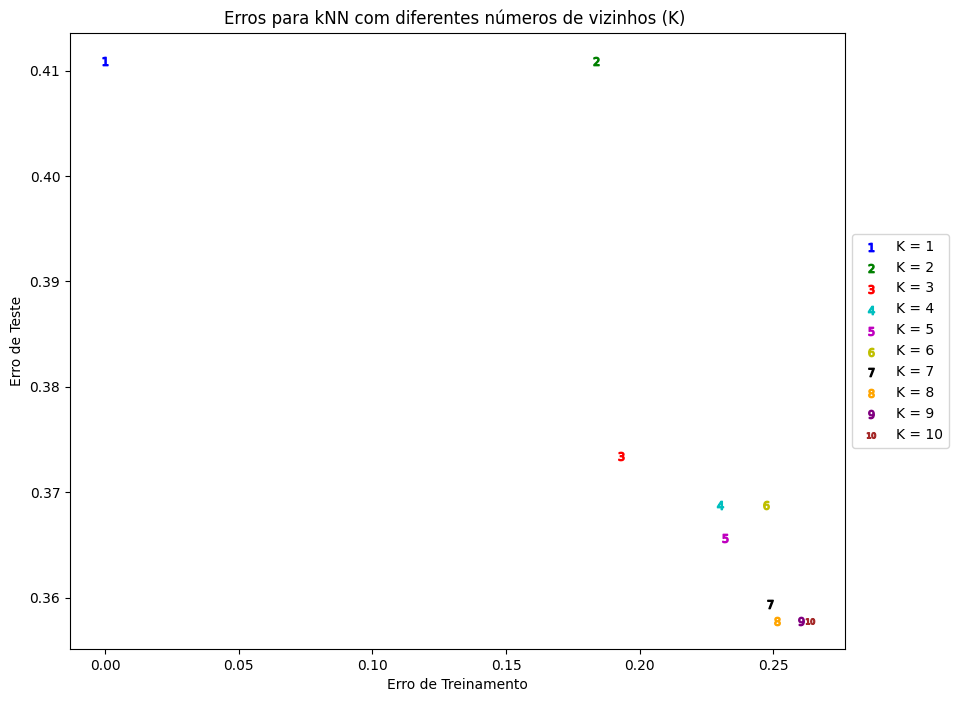

In [189]:
# use numbers as markers for kNN from 1 to 10
plot_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink']

plt.figure(figsize=(10,8))
for k in range(1,11):
    model = kNN(n_neighbors=k)
    model.fit(X_train,y_train.values.ravel())
    in_sample_predictions_k = model.predict(X_train)
    test_predictions_k = model.predict(X_test)
    train_error = np.mean(in_sample_predictions_k != y_train.values.ravel())
    test_error = np.mean(test_predictions_k != y_test.values.ravel())
    plt.scatter(train_error, test_error, label= f'K = {k}', color=plot_colors[k-1], marker=f'${k}$')


plt.title(f'Erros para kNN com diferentes números de vizinhos (K) ')
plt.xlabel('Erro de Treinamento')
plt.ylabel('Erro de Teste')
#move legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
